In [13]:
import tensorflow as tf 
import os

In [14]:
# Setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### Removing Dodgy Images

In [16]:
import cv2
import imghdr

In [17]:
data_dir = 'data'

In [18]:
image_exts = ['jpeg','jpg','bmp','png']

In [19]:
image_exts[2]

'bmp'

In [20]:
os.listdir(data_dir)

['happy', 'sad']

In [28]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data\sad\2ef1f06810af48f9a1219d098156eee9.webp
Image not in ext list data\sad\aaxh2l5ni.webp
Image not in ext list data\sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list data\sad\graphics-vect-depression-png-sorry-mom-for-being-rude-clipart-1713885422507.webp
Image not in ext list data\sad\sad-man-and-rain-1330349202VkV.jpg
Image not in ext list data\sad\YZc3LzlASxePQJ_H-iexKQ.webp


### Loading Data

In [86]:
import numpy as np
from matplotlib import pyplot as plt

In [88]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 173 files belonging to 2 classes.


In [90]:
data_iterator = data.as_numpy_iterator()

In [92]:
batch = data_iterator.next()

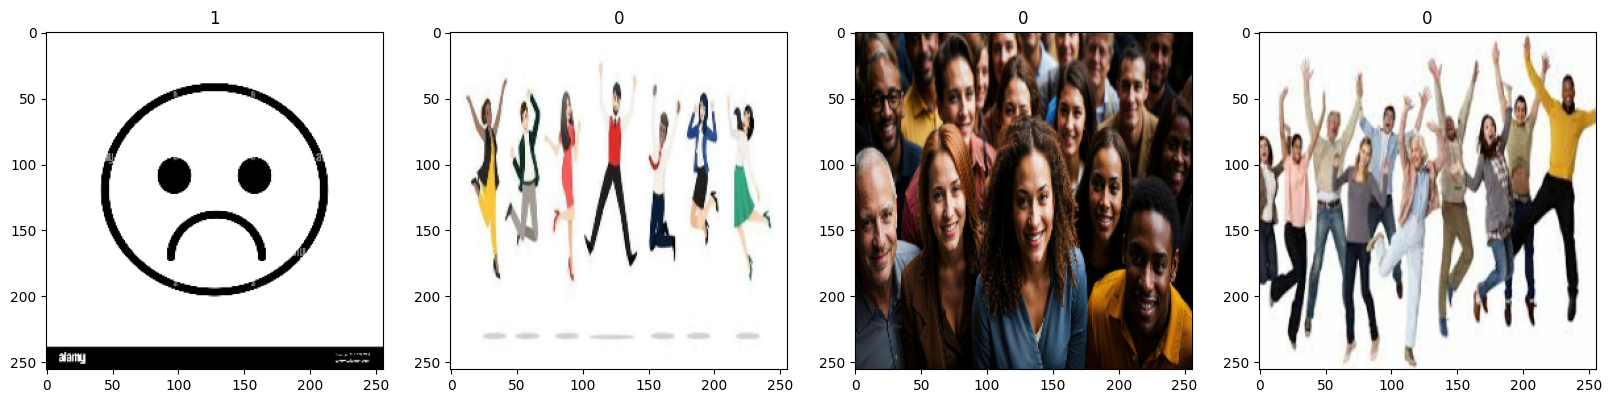

In [94]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing Data

In [151]:
# Scaling the Data
scaled = data.map(lambda x,y: (x/255, y))

In [153]:
scaled_iterator = data.as_numpy_iterator()

In [155]:
batch = scaled_iterator.next()

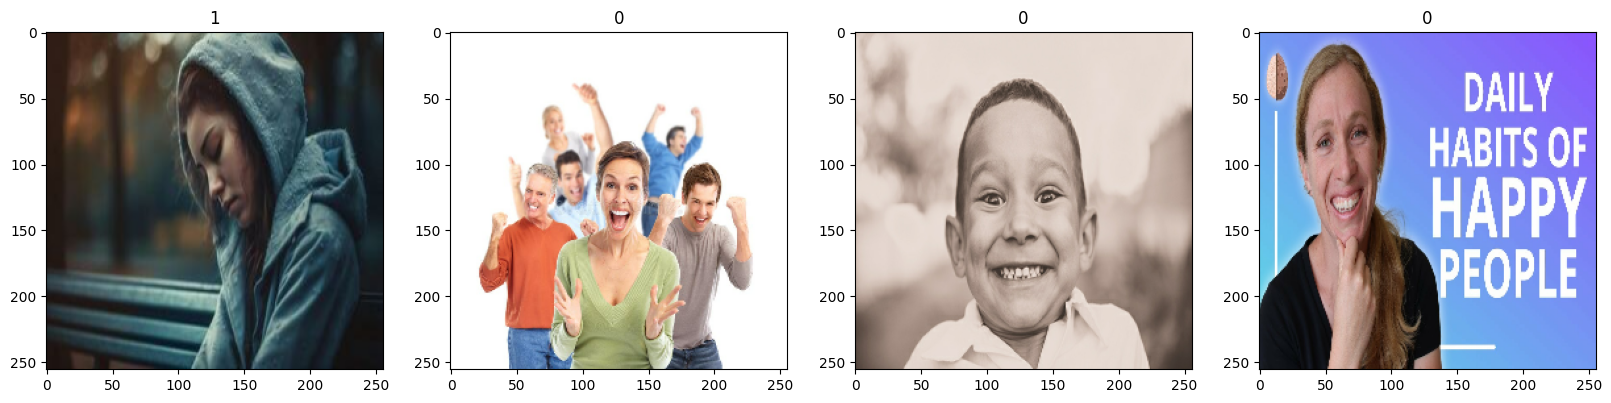

In [157]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [158]:
# Splitting Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [159]:
train_size

4

In [160]:
val_size

2

In [165]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [167]:
len(val)

2